In [1]:
import os
import torch
import torchvision
import tarfile
import torch.nn.functional as F
import torch.nn as nn
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
from torchsummary import summary

In [5]:
# Dowload the dataset
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url, '.')
# Extract from archive
with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
    tar.extractall(path='./data')

Using downloaded and verified file: ./cifar10.tgz


In [2]:
data_dir = './data/hypha'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['.DS_Store', 'test', 'original', 'contam_original_aug', 'train']
['no_contam', '.DS_Store', 'contam']


In [3]:
# transform image to tensor
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
dataset = ImageFolder(data_dir+'/train', transform=ToTensor())
test_dataset = ImageFolder(data_dir+'/test', transform=ToTensor())

In [4]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 32, 32]) 0


tensor([[[0.4471, 0.4510, 0.4431,  ..., 0.5098, 0.5020, 0.4941],
         [0.4157, 0.4196, 0.4275,  ..., 0.4824, 0.4863, 0.4824],
         [0.4078, 0.4039, 0.4000,  ..., 0.4667, 0.4706, 0.4706],
         ...,
         [0.6118, 0.6784, 0.7176,  ..., 0.4667, 0.4745, 0.4863],
         [0.6510, 0.6118, 0.5569,  ..., 0.4824, 0.4784, 0.4745],
         [0.5333, 0.4941, 0.4627,  ..., 0.4784, 0.4941, 0.4941]],

        [[0.3922, 0.3961, 0.3922,  ..., 0.5098, 0.5059, 0.5059],
         [0.3765, 0.3804, 0.3922,  ..., 0.4824, 0.4902, 0.4980],
         [0.3882, 0.3843, 0.3804,  ..., 0.4667, 0.4784, 0.4902],
         ...,
         [0.5922, 0.6588, 0.7059,  ..., 0.4510, 0.4588, 0.4588],
         [0.6314, 0.5922, 0.5373,  ..., 0.4588, 0.4549, 0.4471],
         [0.5059, 0.4667, 0.4431,  ..., 0.4549, 0.4667, 0.4667]],

        [[0.3412, 0.3529, 0.3569,  ..., 0.5176, 0.5216, 0.5255],
         [0.3373, 0.3451, 0.3647,  ..., 0.4902, 0.4980, 0.5098],
         [0.3725, 0.3686, 0.3686,  ..., 0.4588, 0.4667, 0.

Label:  contam (0)


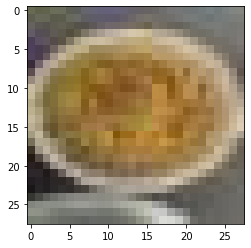

In [45]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

show_example(*dataset[5])

## resize image because original image has too high resolution

In [53]:
import torchvision.transforms as T
import os
from PIL import Image
# # read the input image
# img = Image.open('lounge.jpg')

# # compute the size(width, height) of image
# size = img.size
# print("Size of the Original image:", size)

# train_contam = os.listdir(data_dir + "/train/contam_original")
# train_nocontam = os.listdir(data_dir + "/train/no_contam_original")

# test_contam = os.listdir(data_dir + "/test/contam_original") # list of img name
# test_nocontam = os.listdir(data_dir + "/test/no_contam_original") # list of img name

original_img_path = os.path.join(data_dir, "original")
train_contam_path = os.path.join(original_img_path, "train", "contam_original")
train_no_contam_path = os.path.join(original_img_path, "train", "no_contam_original")
test_contam_path = os.path.join(original_img_path, "test", "contam_original")
test_no_contam_path = os.path.join(original_img_path, "test", "no_contam_original")


train_contam_resized_path = os.path.join(data_dir, "train", "contam")
train_no_contam_resized_path = os.path.join(data_dir, "train", "no_contam")
test_contam_resized_path = os.path.join(data_dir, "test", "contam")
test_no_contam_resized_path = os.path.join(data_dir, "test", "no_contam")

def resize_img_from_folder(folder_path, save_path):
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        
        img = Image.open(img_path)
        # define transform to resize the image with given size
        transform = T.Resize(size = (32,32))

        # apply the transform on the input image
        img = transform(img)
        print(save_path)
        img_name = os.path.join(save_path, filename)
        img.save(img_name)

resize_img_from_folder(train_contam_path, train_contam_resized_path)
resize_img_from_folder(train_no_contam_path, train_no_contam_resized_path)
resize_img_from_folder(test_contam_path, test_contam_resized_path)
resize_img_from_folder(test_no_contam_path, test_no_contam_resized_path)

./data/hypha/train/contam
./data/hypha/train/contam
./data/hypha/train/contam
./data/hypha/train/contam
./data/hypha/train/contam
./data/hypha/train/contam
./data/hypha/train/contam
./data/hypha/train/contam
./data/hypha/train/contam
./data/hypha/train/contam
./data/hypha/train/contam
./data/hypha/train/contam
./data/hypha/train/contam
./data/hypha/train/contam
./data/hypha/train/contam
./data/hypha/train/contam
./data/hypha/train/contam
./data/hypha/train/contam
./data/hypha/train/contam
./data/hypha/train/contam
./data/hypha/train/contam
./data/hypha/train/contam
./data/hypha/train/contam
./data/hypha/train/contam
./data/hypha/train/no_contam
./data/hypha/train/no_contam
./data/hypha/train/no_contam
./data/hypha/train/no_contam
./data/hypha/train/no_contam
./data/hypha/train/no_contam
./data/hypha/train/no_contam
./data/hypha/train/no_contam
./data/hypha/train/no_contam
./data/hypha/train/no_contam
./data/hypha/train/no_contam
./data/hypha/train/no_contam
./data/hypha/train/no_contam

### training and validation datasets

In [54]:
random_seed = 42
torch.manual_seed(random_seed)

val_size = 4
train_size = len(dataset) - val_size
train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(36, 4)

### dataloaders

In [55]:
from torch.utils.data.dataloader import DataLoader

batch_size=2
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
# val_dl = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size, num_workers=4, pin_memory=True)

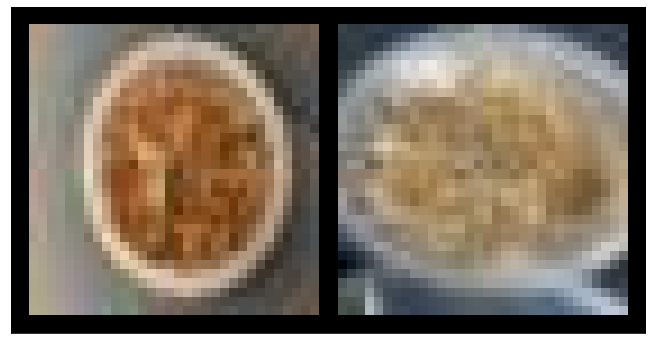

In [56]:
from torchvision.utils import make_grid

# display 1 batch of images, batch_size = 2 for this case
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break
show_batch(train_dl)

## CNN

In [57]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [58]:
class ContamCnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4

            nn.Flatten(), 
            nn.Linear(256*4*4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 10))
        
    def forward(self, xb):
        return self.network(xb)

In [59]:
model = ContamCnnModel()
model

ContamCnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_featu

### test 1 forward pass

In [60]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([2, 3, 32, 32])
out.shape: torch.Size([2, 10])
out[0]: tensor([-0.0265,  0.0131, -0.0133,  0.0204, -0.0307, -0.0246, -0.0141, -0.0535,
         0.0124,  0.0410], grad_fn=<SelectBackward0>)


### GPU


In [62]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)
device = get_default_device()
device

device(type='cpu')

In [63]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);

## model training

In [68]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [65]:
# instantiate again and send to device
model = to_device(ContamCnnModel(), device)

### test evaluation code

In [69]:
evaluate(model, val_dl)

{'val_loss': 2.2831039428710938, 'val_acc': 0.5}

## train

In [70]:
# hyperparameters
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.001

In [71]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 2.4844, val_loss: 1.1288, val_acc: 0.5000
Epoch [1], train_loss: 0.8718, val_loss: 0.8023, val_acc: 0.5000
Epoch [2], train_loss: 0.7244, val_loss: 0.7081, val_acc: 0.5000
Epoch [3], train_loss: 0.7236, val_loss: 0.7600, val_acc: 0.5000
Epoch [4], train_loss: 0.7876, val_loss: 0.7016, val_acc: 0.5000
Epoch [5], train_loss: 0.6840, val_loss: 0.7153, val_acc: 0.5000
Epoch [6], train_loss: 0.7241, val_loss: 0.7574, val_acc: 0.5000
Epoch [7], train_loss: 0.8225, val_loss: 0.8314, val_acc: 0.5000
Epoch [8], train_loss: 0.9339, val_loss: 0.7894, val_acc: 0.5000
Epoch [9], train_loss: 0.7381, val_loss: 0.7078, val_acc: 0.5000


### plot out the validation accuracies to check 
* the model is overfitting because the number of images are too small

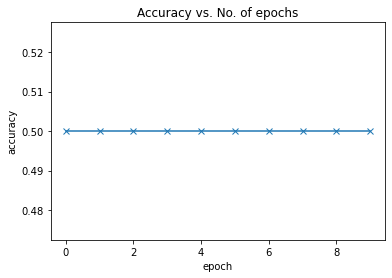

In [73]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');
plot_accuracies(history)

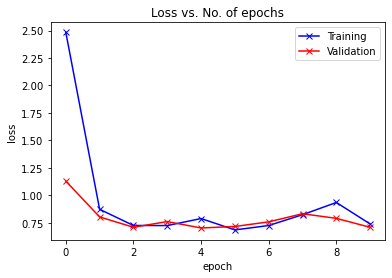

In [75]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');
plot_losses(history)

### test with individual images

In [77]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Label: contam , Predicted: contam


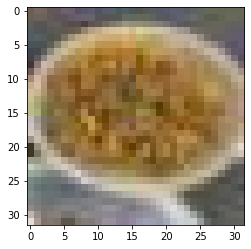

In [78]:
img, label = test_dataset[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classesß[label], ', Predicted:', predict_image(img, model))

In [79]:
from torchvision import models
from torchsummary import summary
summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
            Conv2d-3           [-1, 64, 32, 32]          18,496
              ReLU-4           [-1, 64, 32, 32]               0
         MaxPool2d-5           [-1, 64, 16, 16]               0
            Conv2d-6          [-1, 128, 16, 16]          73,856
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,584
              ReLU-9          [-1, 128, 16, 16]               0
        MaxPool2d-10            [-1, 128, 8, 8]               0
           Conv2d-11            [-1, 256, 8, 8]         295,168
             ReLU-12            [-1, 256, 8, 8]               0
           Conv2d-13            [-1, 256, 8, 8]         590,080
             ReLU-14            [-1, 25